reference
- 파이썬 라이브러리를 활용한 머신러닝, 박해선, 한빛미디어 4장

In [ ]:
# colab 환경에서 온라인 데이터 다운받기
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
!mv /content/adult.data ./

--2022-01-20 05:38:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.2’

adult.data.2        100%[===================>]   3.79M  2.75MB/s    in 1.4s    

2022-01-20 05:39:00 (2.75 MB/s) - ‘adult.data.2’ saved [3974305/3974305]

--2022-01-20 05:39:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2003153 (1.9M) [application/x-httpd-php]
Saving to: ‘adult.test.2’

adult.test.2        100%[===================>]   1.91M  5.20MB/s    in 0.4s    

In [ ]:
# font 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


- `특성공학(feature engineering)` : 가장 적합한 데이터 표현을 찾는 것

In [ ]:
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
        "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
train_data = pd.read_csv('/content/adult.data', names=columns, header = None)
test_data  = pd.read_csv('/content/adult.test', names=columns, sep=' *, *', skiprows=1, na_values='?')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 4.1 범주형 변수

In [ ]:
train_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
# 사용할 열만 추출
train_data = train_data[['age', 'workClass', 'education', 'sex', 'hours-per-week','occupation', 'income']]
test_data  = test_data[['age', 'workClass', 'education', 'sex', 'hours-per-week','occupation', 'income']]

In [ ]:
train_data.head()

,age,workClass,education,sex,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


- target : 소득(income)이 `<=50k`, `>50k`라는 두 클래스를 가진 분류 문제
- feature
  - 연속형 : age, hours-per-week
  - 범주형 : workClass, education, sex, occupation

#### 4.1.1 원-핫-인코딩(가변수)

- `가변수(dummy variable)` : 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것

우선 각 범주형 변수들에 무슨 범주들이 있는지 확인, 오타가 있는지, 어떤 특성이 있는지를 확인하는 절차. 아래의 예시를 보면 workClass, occupation에 ? 범주가 있는 것을 확인할 수 있다. 실제 분석을 할 때는 이런 부분들을 수정하는 절차가 필요하다(이건 예제니까 패스)

In [ ]:
# 범주형 데이터 확인 
print(train_data.sex.value_counts())
print(train_data.workClass.value_counts())
print(train_data.education.value_counts())
print(train_data.occupation.value_counts())

 Male      21790
 Female    10771
Name: sex, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workClass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 

pandas의 get_dummies 함수를 사용하여 더미변수를 생성할 수 있다. 연속형 변수는 그대로지만 범주형 변수들이 새로운 특성으로 확장된 것을 볼 수 있다.



<참조>
*여기서 보여주는 원-핫 인코딩은 통계학에서 사용하는 더미 코딩(dummy_coding)과 비슷하지만 완전히 같지는 않다. 통계학에서는 k개의 값을 가진 범주형 특성을 k-1개의 특성으로 변환하는 것이 일반적이다. 이렇게 하는 이유는 분석의 편리성 때문이다. (더 기술적으로 말하면, 데이터 행렬의 랭크 부족 현상을 피하기 위해서이다.) 네 개의 범주를 네 개의 특성으로 인코딩하면 맨 마지막 특성은 앞의 세 특성을 참조하여 예측할 수 있게 된다. 이렇게 한 열이 다른 열에 의존적이거나 열의 값이 모두 0인 경우를 열 랭크 부족이라 하며, 행렬 분해 방식에 따라 문제가 될 수 있다. scikit-learnㅇ서는 이런 문제를 피해가기 때문에 랭크 부족에 대해 신경 쓰지 않아도 된다.*

In [ ]:
# dummy 변수 생성(pandas.get_dummies)

print("원본 특성: \n", list(train_data.columns), "\n")
train_data_dummies = pd.get_dummies(train_data)
print("get_dummies 후의 특성: \n", list(train_data_dummies.columns))

원본 특성: 
 ['age', 'workClass', 'education', 'sex', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성: 
 ['age', 'hours-per-week', 'workClass_ ?', 'workClass_ Federal-gov', 'workClass_ Local-gov', 'workClass_ Never-worked', 'workClass_ Private', 'workClass_ Self-emp-inc', 'workClass_ Self-emp-not-inc', 'workClass_ State-gov', 'workClass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'sex_ Female', 'sex_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-s

In [ ]:
display(train_data_dummies.head())

,age,hours-per-week,workClass_ ?,workClass_ Federal-gov,workClass_ Local-gov,workClass_ Never-worked,workClass_ Private,workClass_ Self-emp-inc,workClass_ Self-emp-not-inc,workClass_ State-gov,workClass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,sex_ Female,sex_ Male,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# feature, target 분리
features = train_data_dummies.loc[:, 'age':'occupation_ Transport-moving']

# numpy 배열 추출
X = features.values
y = train_data_dummies['income_ >50K'].values # 50K 초과: 1, 50K 이하: 0

print("X.shape: {}, y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44), y.shape: (32561,)


In [ ]:
# 로지스틱 모형 적합
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


#### 4.1.2 숫자로 표현된 범주형 특성

모든 범주형 변수가 항상 문자로 인코딩되어 있지 않다. 따라서 각 변수들을 파악하는 과정이 중요하다. 범주형 특성을 종종 숫자로 인코딩되는데 이렇게 숫자로 된 특성이 연속적인지 이산적인지를 살펴볼 필요가 있다. 만약 순서형 이산형 변수인 경우에는 풀려는 문제, 데이터, 사용하는 머신러닝 알고리즘에 따라 인코딩 방식이 달라진다.

In [ ]:
train_data.head()

,age,workClass,education,sex,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


pandas의 get_dummies 함수는 숫자 특성은 모두 연속형이라 가정하여 가변수를 만들지 않는다.

In [ ]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame 생성
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                       '범주형 특성':['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [ ]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [ ]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


### OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

- scikit-learn을 사용하면 훈련 세트와 테스트 세트를 같은 방식으로 다루기 쉽다.
- 문제점: OneHoeEncoder는 모든 열에 인코딩을 수행한다

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# sparse - False로 설정하면 희소 행렬이 아닌 넘파이 배열을 반환함.
ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [ ]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


하지만, 대부분의 문제에서 범주형 변수와 연속형 변수가 섞여있다. OneHoeEncoder는 모든 특성을 범주형이라고 가정하기 때문에 바로 적용할 수 없다. 이때 사용하는 것이 `ColumnsTransformer`클래스이다. 이 클래스는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있다.

In [ ]:
display(train_data.head())

,age,workClass,education,sex,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workClass', 'education', 'sex','occupation'])]
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# feature 추출
data_features = train_data.drop("income", axis=1)
# train, test 분할
X_train, X_test, y_train, y_test = train_test_split(data_features, train_data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)
print(X_train_trans.shape)
print(X_test_trans.shape)

(24420, 44)
(8141, 44)


In [ ]:
# 로지스틱 회귀 적합
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_trans, y_train)


print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


### 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기
- columntransformer의 경우 각 단계에 이름을 붙여 주어야 하지만 make_column_transformer을 사용하면 자동으로 이름을 붙여준다. 하지만 단점은 0.2버전에서 아직 변환된 출력 열에 대응하는 입력열을 찾지 못한다.

In [ ]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workClass', 'education', 'sex','occupation'])
)

### 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

- 데이터를 잘 표현하는 방법은 데이터가 가진 의미뿐만 아니라 사용하는 모델에 따라서도 달라질 수 있다.
- 선형 모델과 트리 기반 모델(결정 트리, 그레이디언트 부스팅 트리, 랜덤 포레스트 등)은 특성의 표현 방식으로 인해 미치는 영향이 매우 다르다.

In [ ]:
!pip install mglearn
import mglearn

같은 데이터셋으로 선형 회귀 모델과 결정 트리 회귀를 비교해봄. 선형 모델은 선형 관계만 모델링하기 때문에 특성이 하나일 땐 직선으로 나타나고, 결정 트리는 더 복잡한 모델을 만든다. 하지만 이는 데이터의 표현 형태에 따라 달라질 수 있다. 연속형 데이터에 강력한 선형 모델을 만드는 방법은 한 특성을 여러 특성으로 나누는 `구간 분할(bining)`이다. 

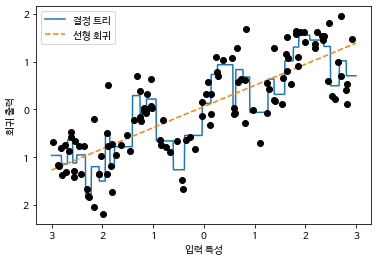

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label = "결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line),'--', label = "선형 회귀")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc = "best")

데이터의 구간을 정하는 방식은 여러 방법이 있다. 예를 들어 균일한 너비로하거나 데이터의 분위를 사용할 수 있다. 이는 KBinsDiscretizer 클래스에 이런 방법들이 구현되어 있다.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins = 10, strategy = "uniform")
kb.fit(X)
print("bin edges: \n", kb.bin_edges_) # 특성별 경계값이 저장됨.

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [ ]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [ ]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [ ]:
# 밀집 배열 형태로 encode
kb = KBinsDiscretizer(n_bins = 10, strategy='uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

In [ ]:
kb.transform(line)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

선형 회귀 모델과 결정 트리 모델이 같은 예측을 만들어 낸다. 
- 선형 모델의 경우 더 유연해졌으며
- 트리 모델의 경우 덜 유연해졌다. 트리 모델은 가장 좋은 구간을 학습하는 모델이다. 
- 일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는 데 아주 좋은 방법이 될 수 있다.

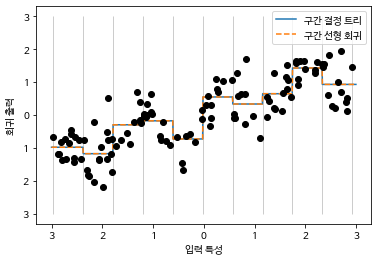

In [ ]:
line_binned = kb.transform(line)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = "구간 결정 트리")

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned),'--', label = "구간 선형 회귀")

plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha = .2)
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc = "best")

### 4.5 상호작용과 다항식
- 특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 `상호작용(interation)`과 `다항식(polynomial)`을 추가하는 것이다.

구간을 분할한 데이터에 기울기를 추가하고 싶다면 원래의 축을 추가하면 된다.

In [ ]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


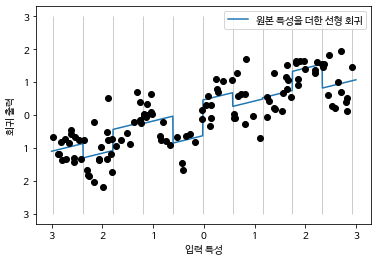

In [ ]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="원본 특성을 더한 선형 회귀")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0], y, 'o', c='k')

위의 예는 모든 구간에서 동일한 기울기를 가지게 된다. 각 구간에서 다른 기울기를 가지도록 하려면 상호작용 특성을 추가하면 된다. 

In [ ]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


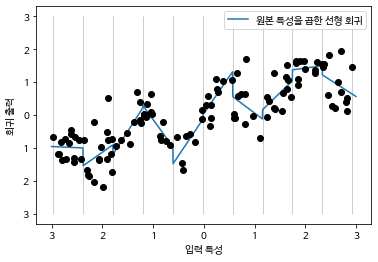

In [ ]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label="원본 특성을 곱한 선형 회귀")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0], y, 'o', c='k')

구간 나누기 외에는 원본 특성의 다항식을 추가하는 방법이 있다. 이는 `PolynomialFeatures`에 구현되어 있다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# X ** 10 까지 고차항을 추가한다.
# 기본값인 include_bias = True 는 절편에 해당하는 1인 특성을 추가한다.
poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [ ]:
X_poly

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01, ...,
         1.03097700e-01, -7.76077513e-02,  5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01, ...,
         2.86036036e+03,  7.73523202e+03,  2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00, ...,
         1.40936394e+01,  1.96178338e+01,  2.73073115e+01],
       ...,
       [-1.88057965e+00,  3.53657981e+00, -6.65082000e+00, ...,
         1.56434973e+02, -2.94188426e+02,  5.53244767e+02],
       [ 2.35535399e+00,  5.54769242e+00,  1.30667795e+01, ...,
         9.47217033e+02,  2.23103142e+03,  5.25486876e+03],
       [ 2.36053451e-01,  5.57212320e-02,  1.31531891e-02, ...,
         9.64012886e-06,  2.27558569e-06,  5.37159857e-07]])

In [ ]:
X_poly.shape

(120, 10)

In [ ]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

이렇게 만들어진 다항식 특성을 선형 모델과 함께 사용하면 전형적인 다항 회귀(polynomial regression)모델이 된다.

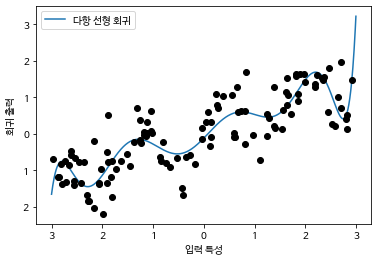

In [ ]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="다항 선형 회귀")
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0], y, 'o', c='k')

비교를 위해 더 복잡한 모델은 커널SVM에 아무 변환도 거치지 않는 데이터를 입력으로 한 출력 결과를 비교. 다항 회귀와 비슷한 복잡도를 가진 예측을 만든다.

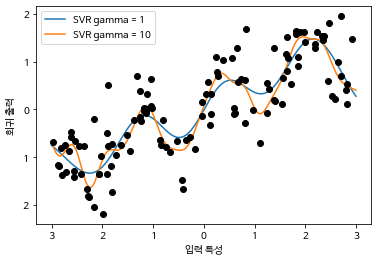

In [ ]:
from sklearn.svm import SVR

for gamma in [1,10]:
  svr = SVR(gamma = gamma).fit(X, y)
  plt.plot(line, svr.predict(line), label = 'SVR gamma = {}'.format(gamma))

plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0], y, 'o', c='k')

##### 보스턴 주택 가격 예측 데이터셋

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2차 다항식 특성 추출
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: ", X_train.shape)
print("X_train_poly.shape: ", X_train_poly.shape)

print("다항 특성 이름: \n", poly.get_feature_names())

# Ridge 적합
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(ridge.score(X_test_poly, y_test)))

# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(rf.score(X_test_poly, y_test)))


X_train.shape:  (379, 13)
X_train_poly.shape:  (379, 105)
다항 특성 이름: 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2'

### 4.6 일변량 비선형 변환
- 트리 기반 모델은 특성의 순서에만 영향을 받지만 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있다.
- 특성과 타깃 값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기가 어렵다. 
- log, exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는데 도움을 준다.
- 대부분의 모델은 각 특성이 (회귀에서는 타깃도) 정규분포와 비슷할 때 최고의 성능을 낸다.

In [ ]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000,3))
w = rnd.normal(size = 3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

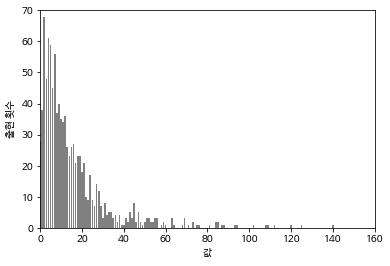

In [ ]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [ ]:
# ridge 회귀 적합
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


$R^2$ 점수가 낮게 나왔다. 다시 말해 X와 y의 관계를 제대로 모델링하지 못했다. log함수를 이용하여 X를 변환한다.

Text(0.5, 0, '값')

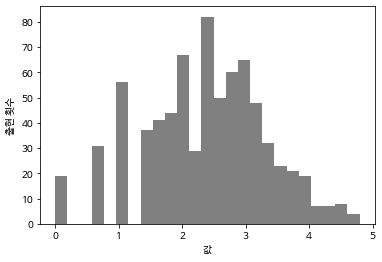

In [ ]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins = 25, color = "gray")
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [ ]:
# 다시 ridge 회귀 적합
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score)) # 성능이 올라간다.

테스트 점수: 0.875


지금까지 보았듯이 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있다. 특별히 선형 모델이나 나이브 베이즈 모델 같은 덜 복잡한 모델일 경우이다. 반면 트리 기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아도 된다. SVM, 최근접 이웃, 신경망 같은 모델은 이따금 구간 분할, 상호작용, 다항식으로 이득을 볼 수 있지만, 선형 모델보다는 영향이 그렇게 뚜렷하지 않다.

### 4.7 특성 자동 선택
- 새로운 특성을 만들다보면 데이터의 차원이 원본 특성 수 이상으로 증가하기 쉽다. 그러나 특성이 추가되면 모델은 더 복잡해지고 과대적합될 가능성도 높아진다.
- 이럴 땐 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋다.
- 이를 위한 전략으로는 `일변량 통계(univariate statistics)`, `모델 기반 선택(model-based selection)`, `반복적 선택(iterative selection)`이 있다.

#### 4.7.1 일변량 통계
- 일변량 통계에서는 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산
- 분류에서는 `분산분석(ANOVA, analysis variance)`라고도 한다.
- 일변량 => 각 특성이 독립적으로 평가된다. 따라서 다른 특성과 깊게 연관된 특성은 선택되지 않을 수 있다.
- 매우 빠르고 평가를 위해 모델을 만들 필요가 없으며, 모델에 상관없이 사용할 수 있다.
- 분류에서는 `f_classif(기본값)`, 회귀에서는 `f_regression`을 이용하여 테스트하고, 계산한 p-value에 기초하여 특성을 제외하는 방식을 선택한다.
- 매우 높은 p-value를 가진 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용한다. 임계값을 계산하는 방법은 각각 다르며 가장 간단한 SelectKBest는 고정된 k개의 특성을 선택하고 SelectPercentile은 지정된 비율만큼 특성을 선택한다. 

In [ ]:
# exsample : cancer data
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 문제를 복잡하게 하기 위해 의미 없는 노이즈 특성을 데이터 추가
# 고정된 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
# 데이터에 노이즈 특성 추가
# 처음 30개는 원본, 뒤에 50개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size = .5)

# f_classif(기본값)과 SelectPercentile을 사용하여 특성의 50%를 선택한다.
select = SelectPercentile(score_func = f_classif, percentile = 50)
select.fit(X_train, y_train)

# 훈련세트에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x7faf88554610>],
 <a list of 1 Text major ticklabel objects>)

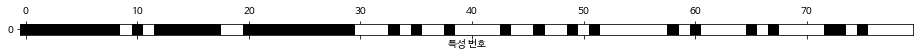

In [ ]:
# get_support() : 선택된 특성을 불리언 값으로 표시
mask = select.get_support()
print(mask)

# true는 검은색, false는 흰색으로 마스킹 --> 노이즈 부분이 많이 제거되었다. 
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [ ]:
# 로지스틱 회귀 적합
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))


전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.933


너무 많은 특성 때문에 모델을 만들기가 현실적으로 어려운 때 일변량 분석을 사용하여 특성을 선택하면 큰 도움이 될 수 있다. 또는 많은 특성들이 확실히 도움이 안 된다고 생각할 때 사용할 수 있다. 

#### 4.7.2 모델 기반 특성 선택

- 모델 기반 특성 선택은 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택
- 특성 선택에 사용하는 지도 학습 모델은 최종적으로 사용할 지도 학습 모델과 같을 필요는 없다. 특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서를 매길 수 있어야 한다.
  - 결정 트리와 이를 기반으로 한 모델(랜덤 포레스트, 부스팅, 등)은 각 특성의 중요도가 담겨 있는 `feature_importance_`속성을 제공한다.
  - 선형 모델 계수의 절댓값도 특성의 중요도를 재는 데 사용할 수 있다.
  - L1 규제를 사용한 선형 모델은 일부 특성의 계수만 학습함. 이를 다른 모델의 특성 선택을 위해 전처리 단계로 사용할 수 잇다.
  - **<주의점> https://explained.ai/rf-importance/ : 랜덤 포레스트의 feature_importance_는 편향되어 있고 특성 선택 방법으로 옳지 않다는 내용. feature importance보다는 permutation importance를 사용해야 함.**

- 일변량 분석과는 반대로 모델 기반 특성 선택은 한 번에 모든 특성을 고려하므로 (사용된 모델이 상호작용을 잡아낼 수 있다면) 상호작용 부분을 반영할 수 있다.
- 모델 기반의 특성 선택은 `SelectFromModel`에 구현되어 있다.
  - (지도 학습 모델로 계산된) 중요도가 지정한 임계치보다 큰 모든 특성을 선택한다.


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


select = SelectFromModel(
    # permutation importance를 사용
    RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = "median",
)

In [ ]:

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape", X_train.shape)
print("X_train_l1.shape", X_train_l1.shape)

X_train.shape (284, 80)
X_train_l1.shape (284, 40)


Text(0.5, 0, '특성번호')

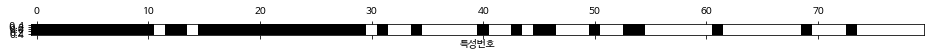

In [ ]:
mask = select.get_support()
# true: 검은색, false : 흰색
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('특성번호')

In [ ]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter = 5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.947




---

permutation_importance_

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.4 MB/s 


In [ ]:
from sklearn.inspection import permutation_importance # sklearn 22 버전부터 해당

train_X, val_X, train_y, val_y = train_test_split(X_train,  y_train, random_state=1)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(train_X, train_y)
result = permutation_importance(rf, val_X, val_y, n_repeats=10,random_state = 0, scoring='f1')

In [ ]:
result.importances_mean

array([-0.0022409 ,  0.00109439,  0.00547196,  0.00547196,  0.        ,
        0.        ,  0.00218878,  0.00389549,  0.        ,  0.        ,
       -0.00123119,  0.        ,  0.00218878,  0.00673051,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00275889,  0.        ,  0.00104228, -0.00399008,  0.        ,
        0.        , -0.00738714,  0.02757504,  0.0012605 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
perm = PermutationImportance(rf, random_state=0).fit(val_X, val_y)

In [ ]:
import eli5
eli5.show_weights(perm)

Weight,Feature
0.0366 ± 0.0225,x27
0.0197 ± 0.0422,x7
0.0197 ± 0.0138,x13
0.0113 ± 0.0113,x6
0.0085 ± 0.0138,x1
0.0056 ± 0.0138,x10
0.0056 ± 0.0138,x2
0.0028 ± 0.0113,x21
0.0028 ± 0.0113,x12
0.0028 ± 0.0113,x8




---



#### 4.7.3 반복적 특성 선택
- 반복적 특성 선택 : 특성의 수가 각기 다른 일련의 모델이 만들어진다.
  - 전진선택법, 후진선택법, 단계적 선택법
  - 계산비용이 비싸다
  - 재귀적 특징 제거(RFE)

Text(0.5, 0, '특성 번호')

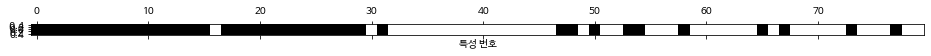

In [ ]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = 40)

select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap = "gray_r")
plt.xlabel("특성 번호")

In [ ]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.940


In [ ]:
print("테스트 점수:{:.3f}".format(select.score(X_test, y_test)))

테스트 점수:0.951


### 4.8 전문가 지식 활용 - 생략